# An example of using EASYMORE with source netCDF files in regular Latitude and Longitude with missing values for a few grids and time steps
## Remapping of ERA5 to subbasins of South Saskatchewan River at Medicine Hat, Alberta, Canada.

In [2]:
# create the complex NaN case

import xarray as xr
import numpy as np
import os
import glob

path = './data/Source_nc_ERA5/'
nc_names = glob.glob(path+'ERA5_NA_*.nc')

for nc_name in nc_names:
    # cut nc file to a given location
    nc_name_base = os.path.basename(nc_name)
    ds = xr.open_dataset(nc_name)
    ds_subset = ds.sel(latitude=slice(52, 50), longitude=slice(-120, -110))
    # add NaN for 6 hours to all the ds_subset
    lat =   50.75
    lon = -114.00
    # Find the index of the nearest grid cell to the given latitude and longitude
    lat_idx = np.abs(ds_subset['latitude']  - lat).argmin().values
    lon_idx = np.abs(ds_subset['longitude'] - lon).argmin().values
    # Insert NaN values at the corresponding grid cell
    ds_subset['airtemp'][0:5, lat_idx, lon_idx] = np.nan
    lat =   50.75
    lon = -113.75
    # Find the index of the nearest grid cell to the given latitude and longitude
    lat_idx = np.abs(ds_subset['latitude']  - lat).argmin().values
    lon_idx = np.abs(ds_subset['longitude'] - lon).argmin().values
    # Insert NaN values at the corresponding grid cell
    ds_subset['airtemp'][0:5, lat_idx, lon_idx] = np.nan
    # save
    if os.path.isfile(path+nc_name_base+'NaN'):
        os.remove(path+nc_name_base+'NaN')
    ds_subset['airtemp'].encoding['_FillValue'] = None
    ds_subset['pptrate'].encoding['_FillValue'] = None
    ds_subset.to_netcdf(path+nc_name_base+'NaN')
    

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/xarray/core/dataarray.py:5999: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  result = self.variable.argmin(dim, axis, keep_attrs, skipna)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/xarray/core/dataarray.py:5999: DeprecationWarning: Behaviour of argmin/argmax with neither dim nor axis argument will change to return a dict of indices of each dimension. To get a single, flat index, please use np.argmin(da.data) or np.argmax(da.data) instead of da.argmin() or da.argmax().
  result = self.variable.argmin(dim, axis, keep_attrs, skipna)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/xarray/core/dataarray.py:5999: DeprecationWarning: Behaviour of argmin/arg

In [3]:
# loading EASYMORE
from easymore import Easymore

# initializing EASYMORE object
esmr = Easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'ERA5_Medicine_Hat_NaN'              
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = './temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = './data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
esmr.target_shp_ID            = 'COMID' # if not provided easymore give ID according to shape order in shapefile
esmr.target_shp_lat           = 'lat' # if not provided the easymore provides lat from shape centroid
esmr.target_shp_lon           = 'lon' # if not provided the easymore provides lon from shape centroid
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = './data/Source_nc_ERA5/ERA5_NA_*.ncNaN'
# for complex issue with NaN this can be uncommented
# esmr.source_nc                = '../data/Source_nc_ERA5/ERA5_NA_*.ncNaN'
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['airtemp','pptrate']
# rename the variables from source netCDF file(s) in the remapped files;
# it will be the same as source if not provided
esmr.var_names_remapped       = ['temperature','precipitation']
# name of variable longitude in source netCDF files
esmr.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
esmr.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
esmr.var_time                 = 'time'
# location where the remapped netCDF file will be saved
esmr.output_dir               = './output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
esmr.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
esmr.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well
esmr.save_csv                 = True
esmr.complevel                 =  9
# if uncommented EASYMORE will use this and skip GIS tasks
#esmr.remap_csv                = esmr.temp_dir+esmr.case_name +'_remapping.csv'

esmr.source_nc_resolution = 0.25

# execute EASYMORE
esmr.nc_remapper()

EASYMORE version 2.0.0 is initiated.
no author name is provided. The author name is changed to (author name)!
EASYMORE is given multiple variables for remapping but only one format and fill value. EASYMORE repeats the format and fill value for all the variables in output files
EASYMORE will remap variable  airtemp  from source file to variable  temperature  in remapped netCDF file
EASYMORE will remap variable  pptrate  from source file to variable  precipitation  in remapped netCDF file
EASYMORE detects that the variables from the netCDF files are identicalin dimensions of the variables and latitude and longitude
EASYMORE detects that all the variables have dimensions of:
['time', 'latitude', 'longitude']
EASYMORE detects that the longitude variables has dimensions of:
['longitude']
EASYMORE detects that the latitude variables has dimensions of:
['latitude']
--CREATING-REMAPPING-FILE--
Started at date and time 2023-09-14 12:01:39.996602
EASYMORE detects that target shapefile is in WGS8

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 9)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -110.5 -110.2 -110.0
  * latitude   (latitude) float32 52.0 51.75 51.5 51.25 ... 50.5 50.25 50.0
    time       datetime64[ns] 1979-01-01T10:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[2

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 9)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -110.5 -110.2 -110.0
  * latitude   (latitude) float32 52.0 51.75 51.5 51.25 ... 50.5 50.25 50.0
    time       datetime64[ns] 1979-01-01T18:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[0

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 9)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -110.5 -110.2 -110.0
  * latitude   (latitude) float32 52.0 51.75 51.5 51.25 ... 50.5 50.25 50.0
    time       datetime64[ns] 1979-01-02T05:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[2

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 9)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -110.5 -110.2 -110.0
  * latitude   (latitude) float32 52.0 51.75 51.5 51.25 ... 50.5 50.25 50.0
    time       datetime64[ns] 1979-01-02T14:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[2

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 9)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -110.5 -110.2 -110.0
  * latitude   (latitude) float32 52.0 51.75 51.5 51.25 ... 50.5 50.25 50.0
    time       datetime64[ns] 1979-01-02T06:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[4

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

Remapping ./data/Source_nc_ERA5/ERA5_NA_19790102.ncNaN to ./output/ERA5_Medicine_Hat_NaN_remapped_ERA5_NA_19790102.ncNaN 
Started at date and time 2023-09-14 12:01:44.823672 
Converting variable temperature from remapped file of ./output/ERA5_Medicine_Hat_NaN_remapped_ERA5_NA_19790102.ncNaN to ./output/ERA5_Medicine_Hat_NaN_remapped_temperature_K_ERA5_NA_19790102.ncNaN.csv 
Saving the ID, lat, lon map at ./output/ERA5_Medicine_Hat_NaN_remapped_temperature_K_ERA5_NA_19790102.ncNaN.csv 
Converting variable precipitation from remapped file of ./output/ERA5_Medicine_Hat_NaN_remapped_ERA5_NA_19790102.ncNaN to ./output/ERA5_Medicine_Hat_NaN_remapped_precipitation_kgm-2s-1_ERA5_NA_19790102.ncNaN.csv 
Saving the ID, lat, lon map at ./output/ERA5_Medicine_Hat_NaN_remapped_precipitation_kgm-2s-1_ERA5_NA_19790102.ncNaN.csv 
Ended at date and time 2023-09-14 12:01:45.600232 
It took 0.77656 seconds to finish the remapping of variable(s) 
---------------------
<xarray.Dataset>
Dimensions:    (longi

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

[[249.16577 248.37207 247.68874 247.3221  247.26297 247.34312 247.40227
  247.443   247.52841 247.42854 246.69133 245.3917  244.55461 245.21823
  247.23405 249.45226 251.05807 252.23419 253.52333 254.95964 256.05954
  256.41696 256.1686  255.7586  255.41695 255.07791 254.79012 254.75464
  254.85844 254.70207 254.275   254.02136 254.0792  254.04765 253.72833
  253.44447 253.41951 253.44447 253.34329 253.22371 253.15012]
 [248.45091 248.20386 248.2354  248.20386 248.27614 248.55736 248.62962
  248.31819 248.24197 248.71242 248.73213 247.30765 245.2997  244.70178
  246.2038  248.5245  250.16318 250.89644 251.53116 252.80057 254.59169
  256.05032 256.51685 256.2448  255.91762 255.74152 255.54836 255.4038
  255.40512 255.23822 254.68631 254.18431 254.15804 254.29471 254.1186
  253.76643 253.60611 253.57326 253.43922 253.23817 253.09099]
 [250.10274 250.1461  250.06331 249.54819 249.26697 249.70587 250.10141
  249.56133 248.6651  248.5797  249.01729 248.51924 246.74783 245.08287
  244.84108 

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 9)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -110.5 -110.2 -110.0
  * latitude   (latitude) float32 52.0 51.75 51.5 51.25 ... 50.5 50.25 50.0
    time       datetime64[ns] 1979-01-03T02:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[0

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 9)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -110.5 -110.2 -110.0
  * latitude   (latitude) float32 52.0 51.75 51.5 51.25 ... 50.5 50.25 50.0
    time       datetime64[ns] 1979-01-03T19:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[4

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)


In [1]:
# create the complex NaN case

import xarray as xr
import numpy as np
import os
import glob

path = './data/Source_nc_ERA5/'
nc_names = glob.glob(path+'ERA5_NA_*.nc')

for nc_name in nc_names:
    # cut nc file to a given location
    nc_name_base = os.path.basename(nc_name)
    ds = xr.open_dataset(nc_name)
    ds_subset = ds.sel(latitude=slice(50.2, 50), longitude=slice(-114.2, -114))
    print(ds_subset)
    # save
    if os.path.isfile(path+nc_name_base+'onegrid'):
        os.remove(path+nc_name_base+'onegrid')
    ds_subset['airtemp'].encoding['_FillValue'] = None
    ds_subset['pptrate'].encoding['_FillValue'] = None
    ds_subset.to_netcdf(path+nc_name_base+'onegrid')

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1, time: 24)
Coordinates:
  * longitude  (longitude) float32 -114.0
  * latitude   (latitude) float32 50.0
  * time       (time) datetime64[ns] 1979-01-02 ... 1979-01-02T23:00:00
Data variables:
    pptrate    (time, latitude, longitude) float32 ...
    airtemp    (time, latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
<xarray.Dataset>
Dimensions:    (lon

In [1]:
# loading EASYMORE
from easymore import Easymore

# initializing EASYMORE object
esmr = Easymore()

# specifying EASYMORE objects
# name of the case; the temporary, remapping and remapped file names include case name
esmr.case_name                = 'ERA5_Medicine_Hat_OneGrid'              
# temporary path that the EASYMORE generated GIS files and remapped file will be saved
esmr.temp_dir                 = './temporary/'
# name of target shapefile that the source netcdf files should be remapped to
esmr.target_shp               = './data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
esmr.target_shp_ID            = 'COMID' # if not provided easymore give ID according to shape order in shapefile
esmr.target_shp_lat           = 'lat' # if not provided the easymore provides lat from shape centroid
esmr.target_shp_lon           = 'lon' # if not provided the easymore provides lon from shape centroid
# name of netCDF file(s); multiple files can be specified with *
esmr.source_nc                = './data/Source_nc_ERA5/ERA5_NA_*.nconegrid'
# for complex issue with NaN this can be uncommented
# esmr.source_nc                = '../data/Source_nc_ERA5/ERA5_NA_*.ncNaN'
# name of variables from source netCDF file(s) to be remapped
esmr.var_names                = ['airtemp','pptrate']
# rename the variables from source netCDF file(s) in the remapped files;
# it will be the same as source if not provided
esmr.var_names_remapped       = ['temperature','precipitation']
# name of variable longitude in source netCDF files
esmr.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
esmr.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
esmr.var_time                 = 'time'
# location where the remapped netCDF file will be saved
esmr.output_dir               = './output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
esmr.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
esmr.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well
esmr.save_csv                 = True
esmr.complevel                 =  9
# if uncommented EASYMORE will use this and skip GIS tasks
#esmr.remap_csv                = esmr.temp_dir+esmr.case_name +'_remapping.csv'

esmr.source_nc_resolution = 0.25

# execute EASYMORE
esmr.nc_remapper()


EASYMORE version 2.0.0 is initiated.
no author name is provided. The author name is changed to (author name)!
EASYMORE is given multiple variables for remapping but only one format and fill value. EASYMORE repeats the format and fill value for all the variables in output files
EASYMORE will remap variable  airtemp  from source file to variable  temperature  in remapped netCDF file
EASYMORE will remap variable  pptrate  from source file to variable  precipitation  in remapped netCDF file
EASYMORE detects that the variables from the netCDF files are identicalin dimensions of the variables and latitude and longitude
EASYMORE detects that all the variables have dimensions of:
['time', 'latitude', 'longitude']
EASYMORE detects that the longitude variables has dimensions of:
['longitude']
EASYMORE detects that the latitude variables has dimensions of:
['latitude']
--CREATING-REMAPPING-FILE--
Started at date and time 2023-09-14 11:59:22.838947
EASYMORE detects that target shapefile is in WGS8

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1)
Coordinates:
  * longitude  (longitude) float32 -114.0
  * latitude   (latitude) float32 50.0
    time       datetime64[ns] 1979-01-01T17:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[247.52448]]
(1, 1)
[[247.52448]]
(1, 1)
<xarray.Dataset>
Dimensions:    (longi

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

[[0.]]
(1, 1)
[[0.]]
(1, 1)
<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1)
Coordinates:
  * longitude  (longitude) float32 -114.0
  * latitude   (latitude) float32 50.0
    time       datetime64[ns] 1979-01-01T15:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[0.]]
(1, 1)
[[0.]]
(1, 1)
<xarray.Dataset>
Dimensi

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1)
Coordinates:
  * longitude  (longitude) float32 -114.0
  * latitude   (latitude) float32 50.0
    time       datetime64[ns] 1979-01-02T06:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[253.80849]]
(1, 1)
[[253.80849]]
(1, 1)
<xarray.Dataset>
Dimensions:    (longi

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

[[0.]]
(1, 1)
[[0.]]
(1, 1)
<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1)
Coordinates:
  * longitude  (longitude) float32 -114.0
  * latitude   (latitude) float32 50.0
    time       datetime64[ns] 1979-01-02T02:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[0.]]
(1, 1)
[[0.]]
(1, 1)
<xarray.Dataset>
Dimensi

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

Remapping ./data/Source_nc_ERA5/ERA5_NA_19790102.nconegrid to ./output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790102.nconegrid 
Started at date and time 2023-09-14 11:59:26.179428 
Converting variable temperature from remapped file of ./output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790102.nconegrid to ./output/ERA5_Medicine_Hat_OneGrid_remapped_temperature_K_ERA5_NA_19790102.nconegrid.csv 
Saving the ID, lat, lon map at ./output/ERA5_Medicine_Hat_OneGrid_remapped_temperature_K_ERA5_NA_19790102.nconegrid.csv 
Converting variable precipitation from remapped file of ./output/ERA5_Medicine_Hat_OneGrid_remapped_ERA5_NA_19790102.nconegrid to ./output/ERA5_Medicine_Hat_OneGrid_remapped_precipitation_kgm-2s-1_ERA5_NA_19790102.nconegrid.csv 
Saving the ID, lat, lon map at ./output/ERA5_Medicine_Hat_OneGrid_remapped_precipitation_kgm-2s-1_ERA5_NA_19790102.nconegrid.csv 
Ended at date and time 2023-09-14 11:59:26.714264 
It took 0.534836 seconds to finish the remapping of variable(s) 

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1)
Coordinates:
  * longitude  (longitude) float32 -114.0
  * latitude   (latitude) float32 50.0
    time       datetime64[ns] 1979-01-03T21:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[257.57733]]
(1, 1)
[[257.57733]]
(1, 1)
<xarray.Dataset>
Dimensions:    (longi

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_temp['values_w'].fillna(fill_value, inplace=True)
/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/easymore/remapper.py:1846: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-9999.00' has dtype incompatible with flo

[[1.3334894e-06]]
(1, 1)
[[1.3334894e-06]]
(1, 1)
<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1)
Coordinates:
  * longitude  (longitude) float32 -114.0
  * latitude   (latitude) float32 50.0
    time       datetime64[ns] 1979-01-03T20:00:00
Data variables:
    pptrate    (latitude, longitude) float32 ...
    airtemp    (latitude, longitude) float32 ...
Attributes:
    Author:                                   Created by W. Knoben from ERA5 ...
    History:                                  Created Thu Mar 26 18:19:23 2020
    Source:                                   Written using Python (github.co...
    Reason:                                   (1) ERA5 surface and pressure f...
    Conventions (pressure level (10m) data):  CF-1.6
    history (pressure level (10m) data):      2020-01-29 19:02:52 GMT by grib...
    Conventions (surface level data):         CF-1.6
    history (surface level data):             2020-01-29 19:02:52 GMT by grib...
[[2.1335832e-06]]
(1, 1)
[[2.1

[[50.25 50.25 50.25]
 [50.   50.   50.  ]
 [49.75 49.75 49.75]]
[[-114.25 -114.   -113.75]
 [-114.25 -114.   -113.75]
 [-114.25 -114.   -113.75]]
   lat_s  lon_s  ID_s                                           geometry
0   50.0 -114.0     1  POLYGON ((-114.00000 50.12500, -113.87500 50.1...
     Unnamed: 0.1  Unnamed: 0  S_1_ID    S_1_lat     S_1_lon  S_1_COMID  \
0               0           3     135  49.743159 -114.054774      31965   
1               1           4     152  50.025441 -114.039026      40718   
2               2          10     197  49.902962 -113.801856      47658   
3               3           8     187  49.742152 -113.864239      64388   
4               4           7     175  50.150573 -113.936682      69808   
..            ...         ...     ...        ...         ...        ...   
412           412         412     413  49.909339 -111.281874      55509   
413           413         413     414  50.463768 -111.376871      10559   
414           414         414    

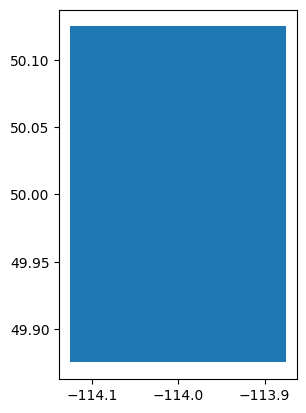

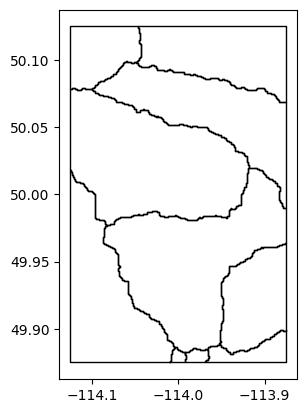

In [12]:
print(esmr.lat_expanded)
print(esmr.lon_expanded)

import geopandas as gpd
import pandas as pd

shp = gpd.read_file('./temporary/ERA5_Medicine_Hat_OneGrid_source_shapefile.shp')
shp.plot()
print(shp)

shp = gpd.read_file('./temporary/ERA5_Medicine_Hat_OneGrid_intersected_shapefile.shp')
shp.plot(facecolor='None')

int = pd.read_csv('./temporary/ERA5_Medicine_Hat_OneGrid_remapping.csv')
print(int)

------------
------------
# Visualization of the source and result using easymore functionality

EASYMORE version 2.0.0 is initiated.
EASYMORE detects case 1 - regular lat/lon
9 41
[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   52.   52.   52.   52.   52.   52.   52.   52.   52.   52.   52.
  52.   52.   52.   52.   52.   52.   52.   52.   52.   52.   52.   52.
  52.   52.   52.   52.   52.   52.   52.   52.   52.   52.   52.   52.
  52.   52.   52.   52.   52.   52.    0.  ]
 [ 0.   51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75
  51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75
  51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75 51.75
  51.75 51.75 51.75 51.75 51.75 51.75  0.  ]
 [ 0.   51.5  51.5  51.5  51.5  51.5  51.5  51.5  51.5  51.5  51.5  51.5
  51.5  51.5  51.5  51.5  51.5  51.5  51.5  51.5  51.5

/Users/shg096/Desktop/EASYMORE/easymore-env/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/subprocess.py:1052: ResourceWarning: subprocess 37132 is still running
  _warn("subprocess %s is still running" % self.pid,


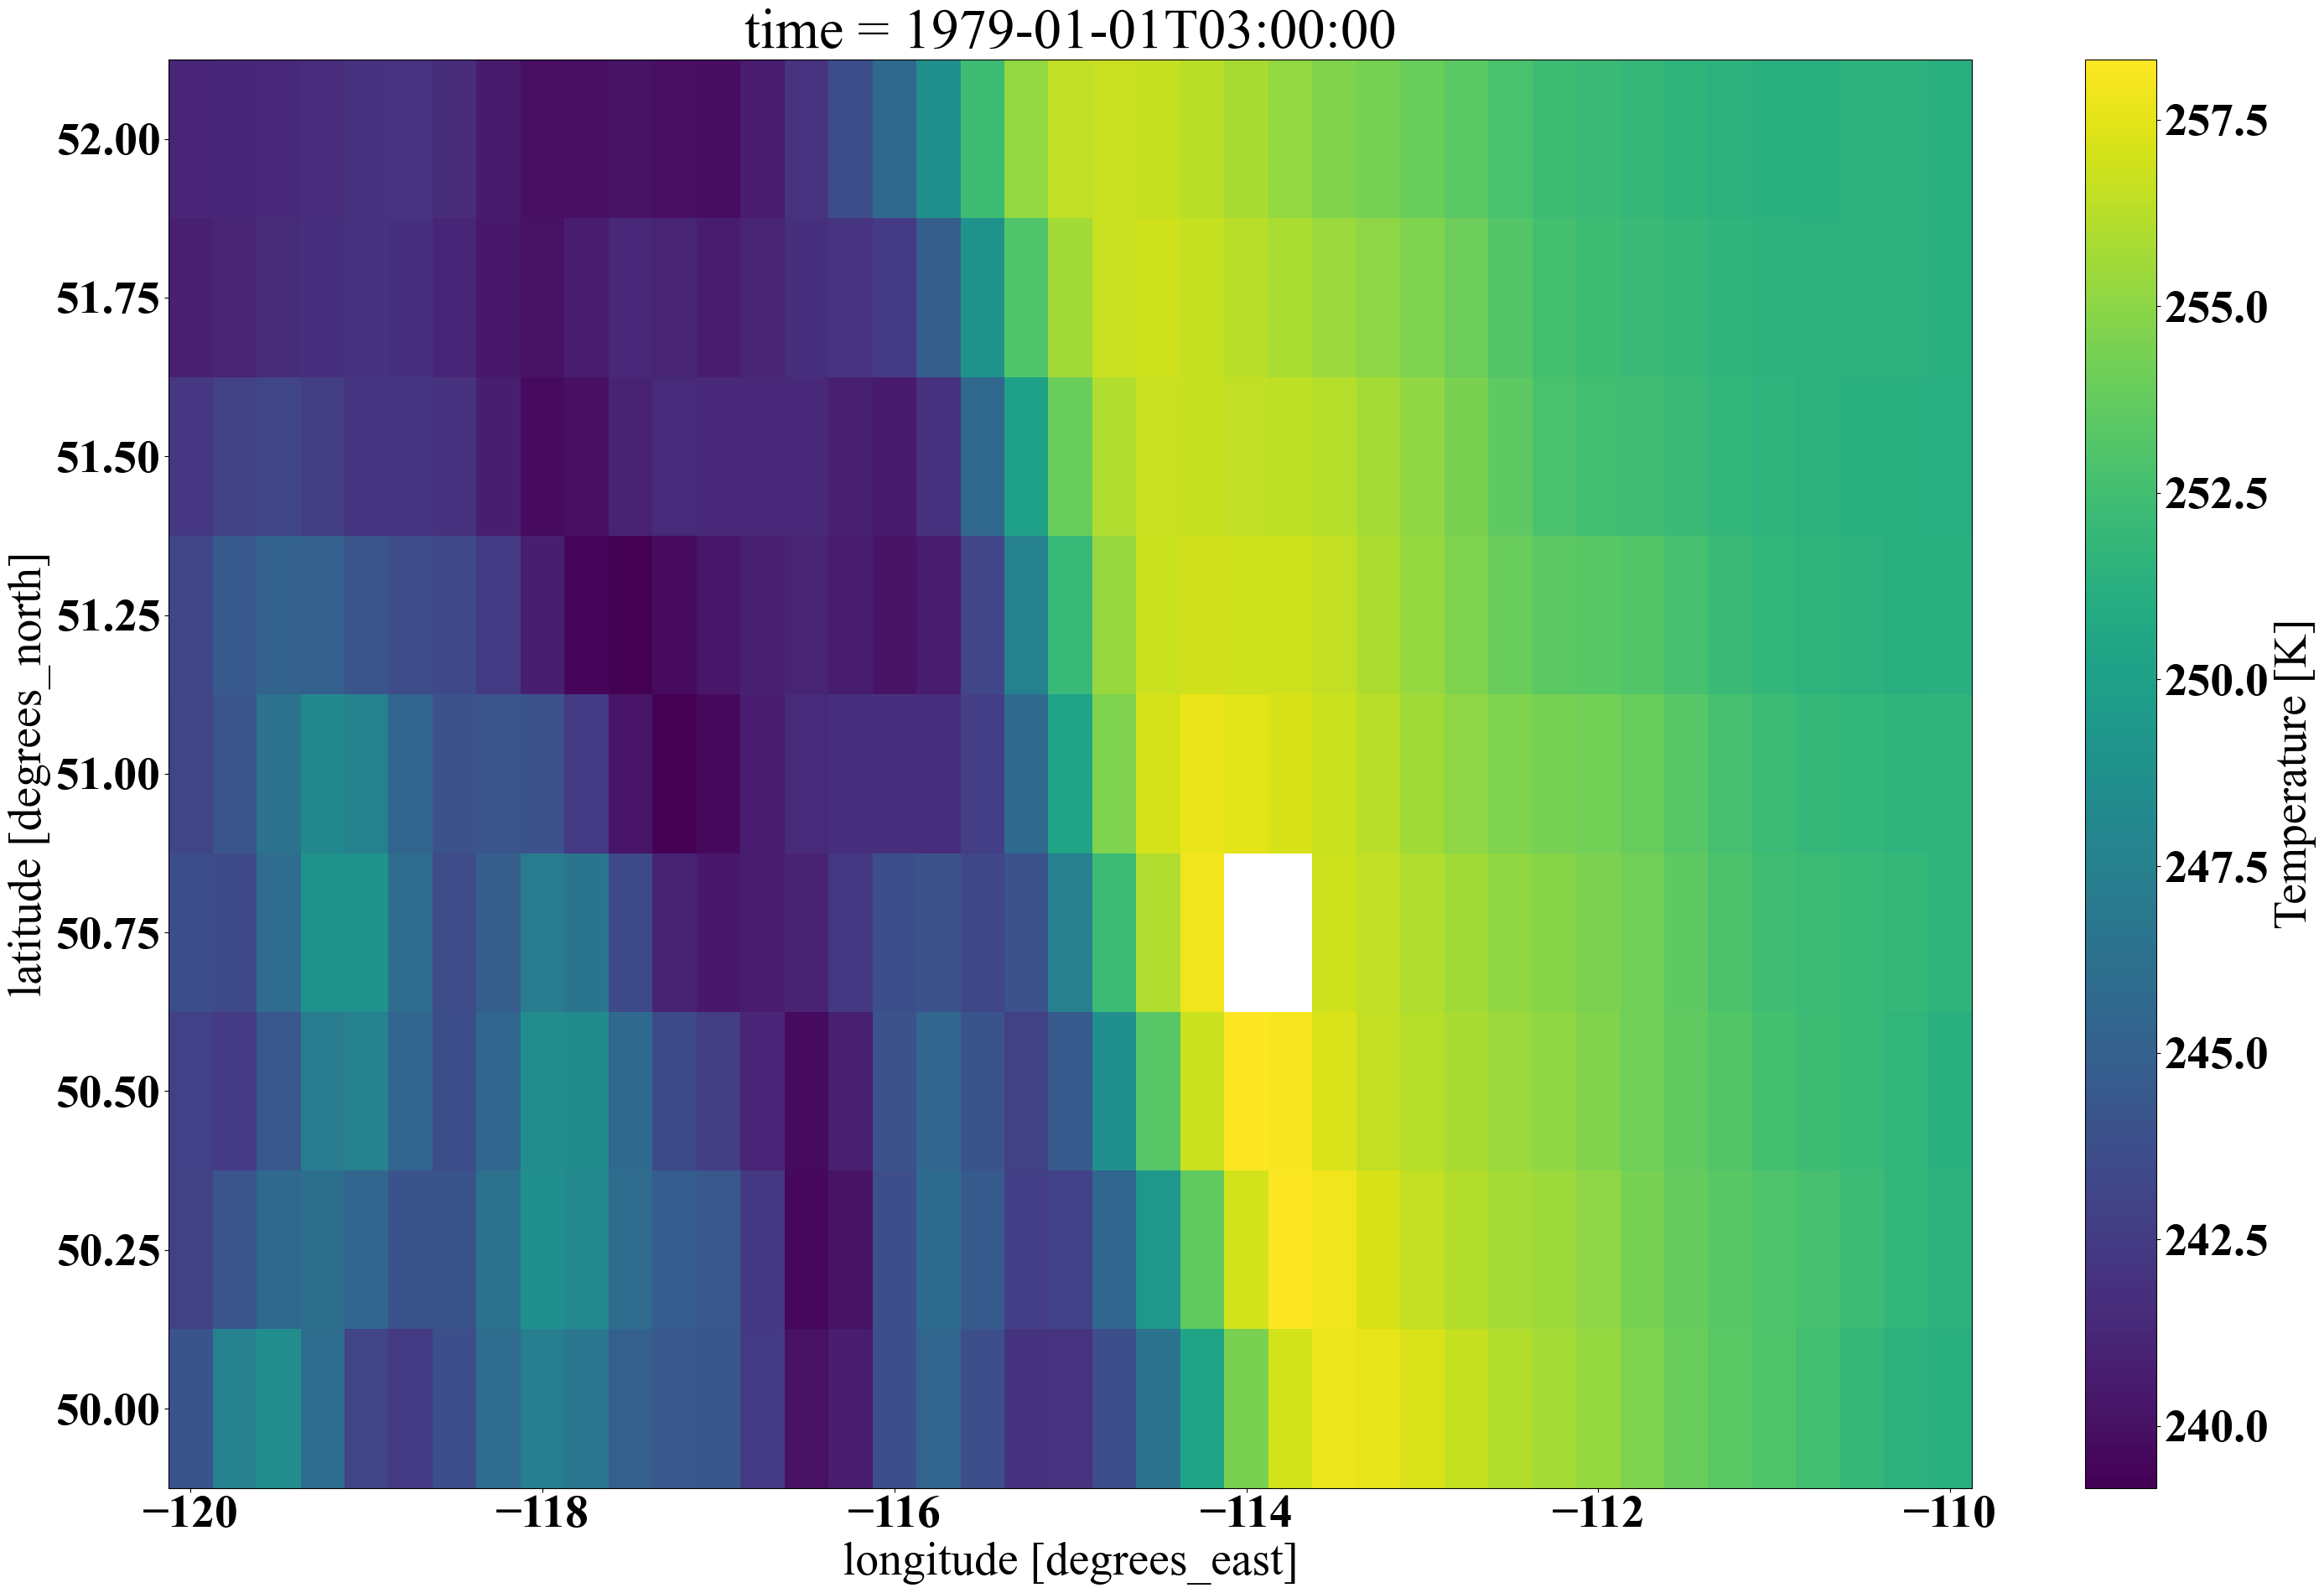

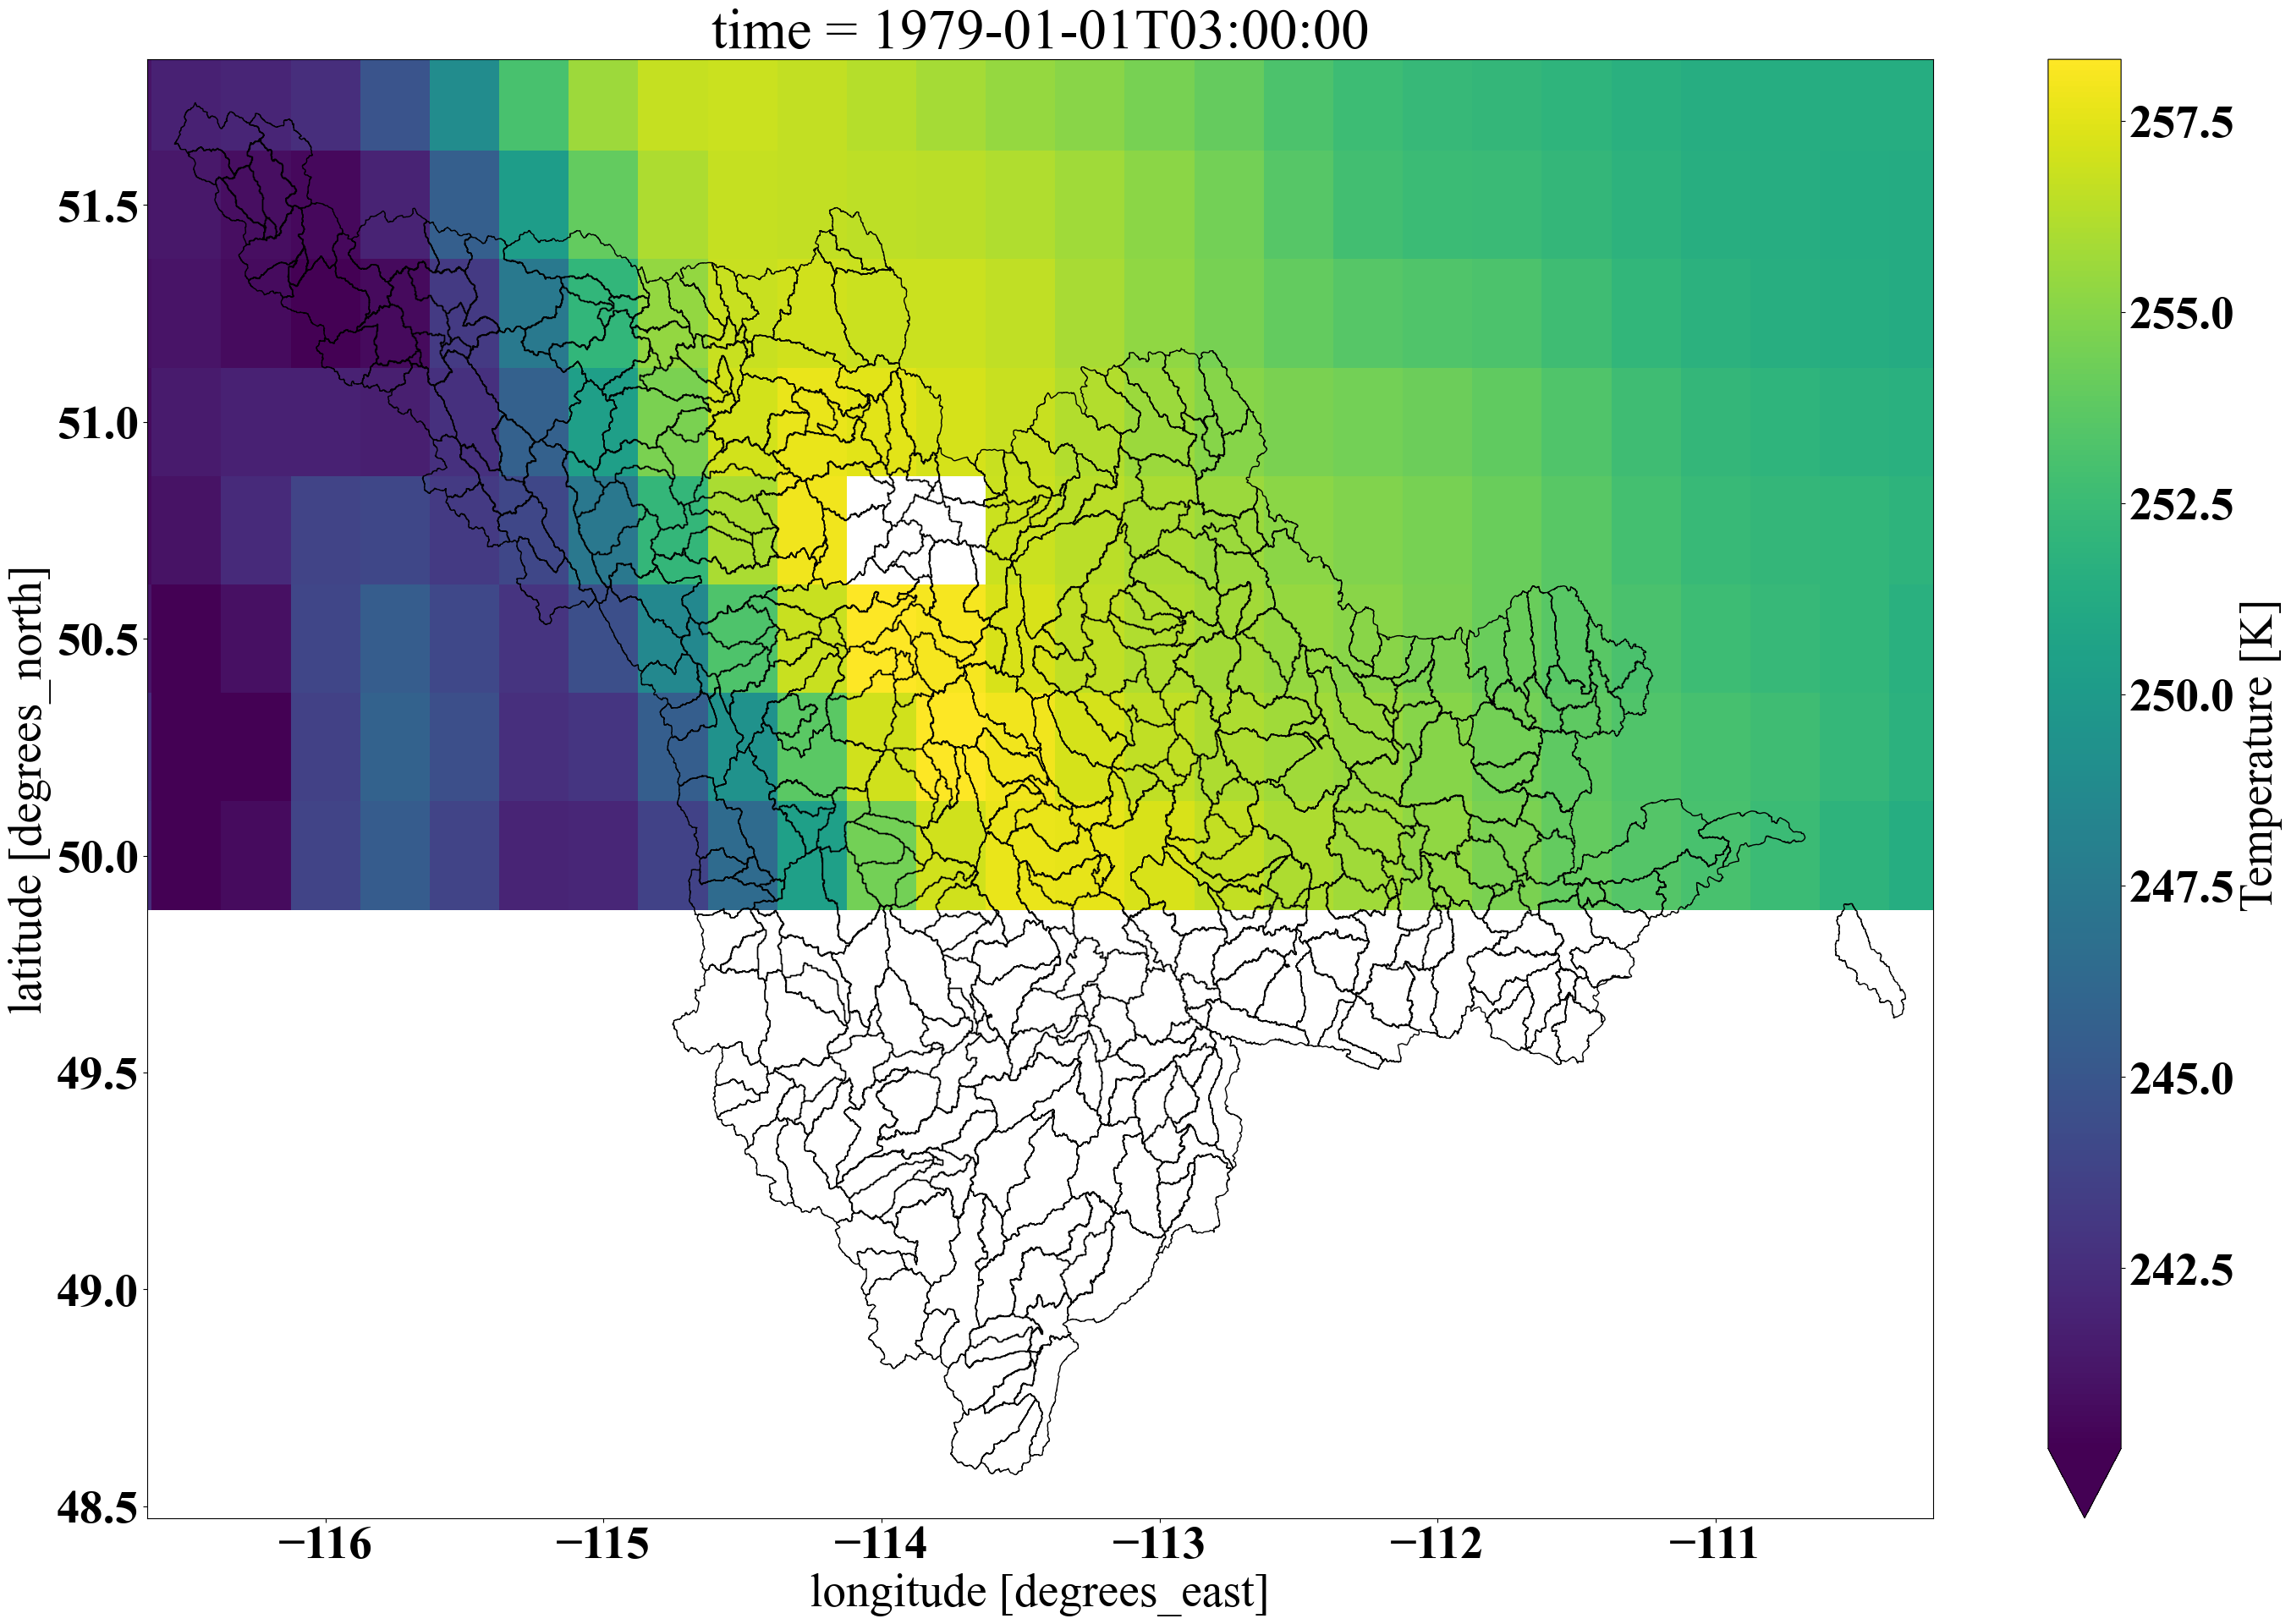

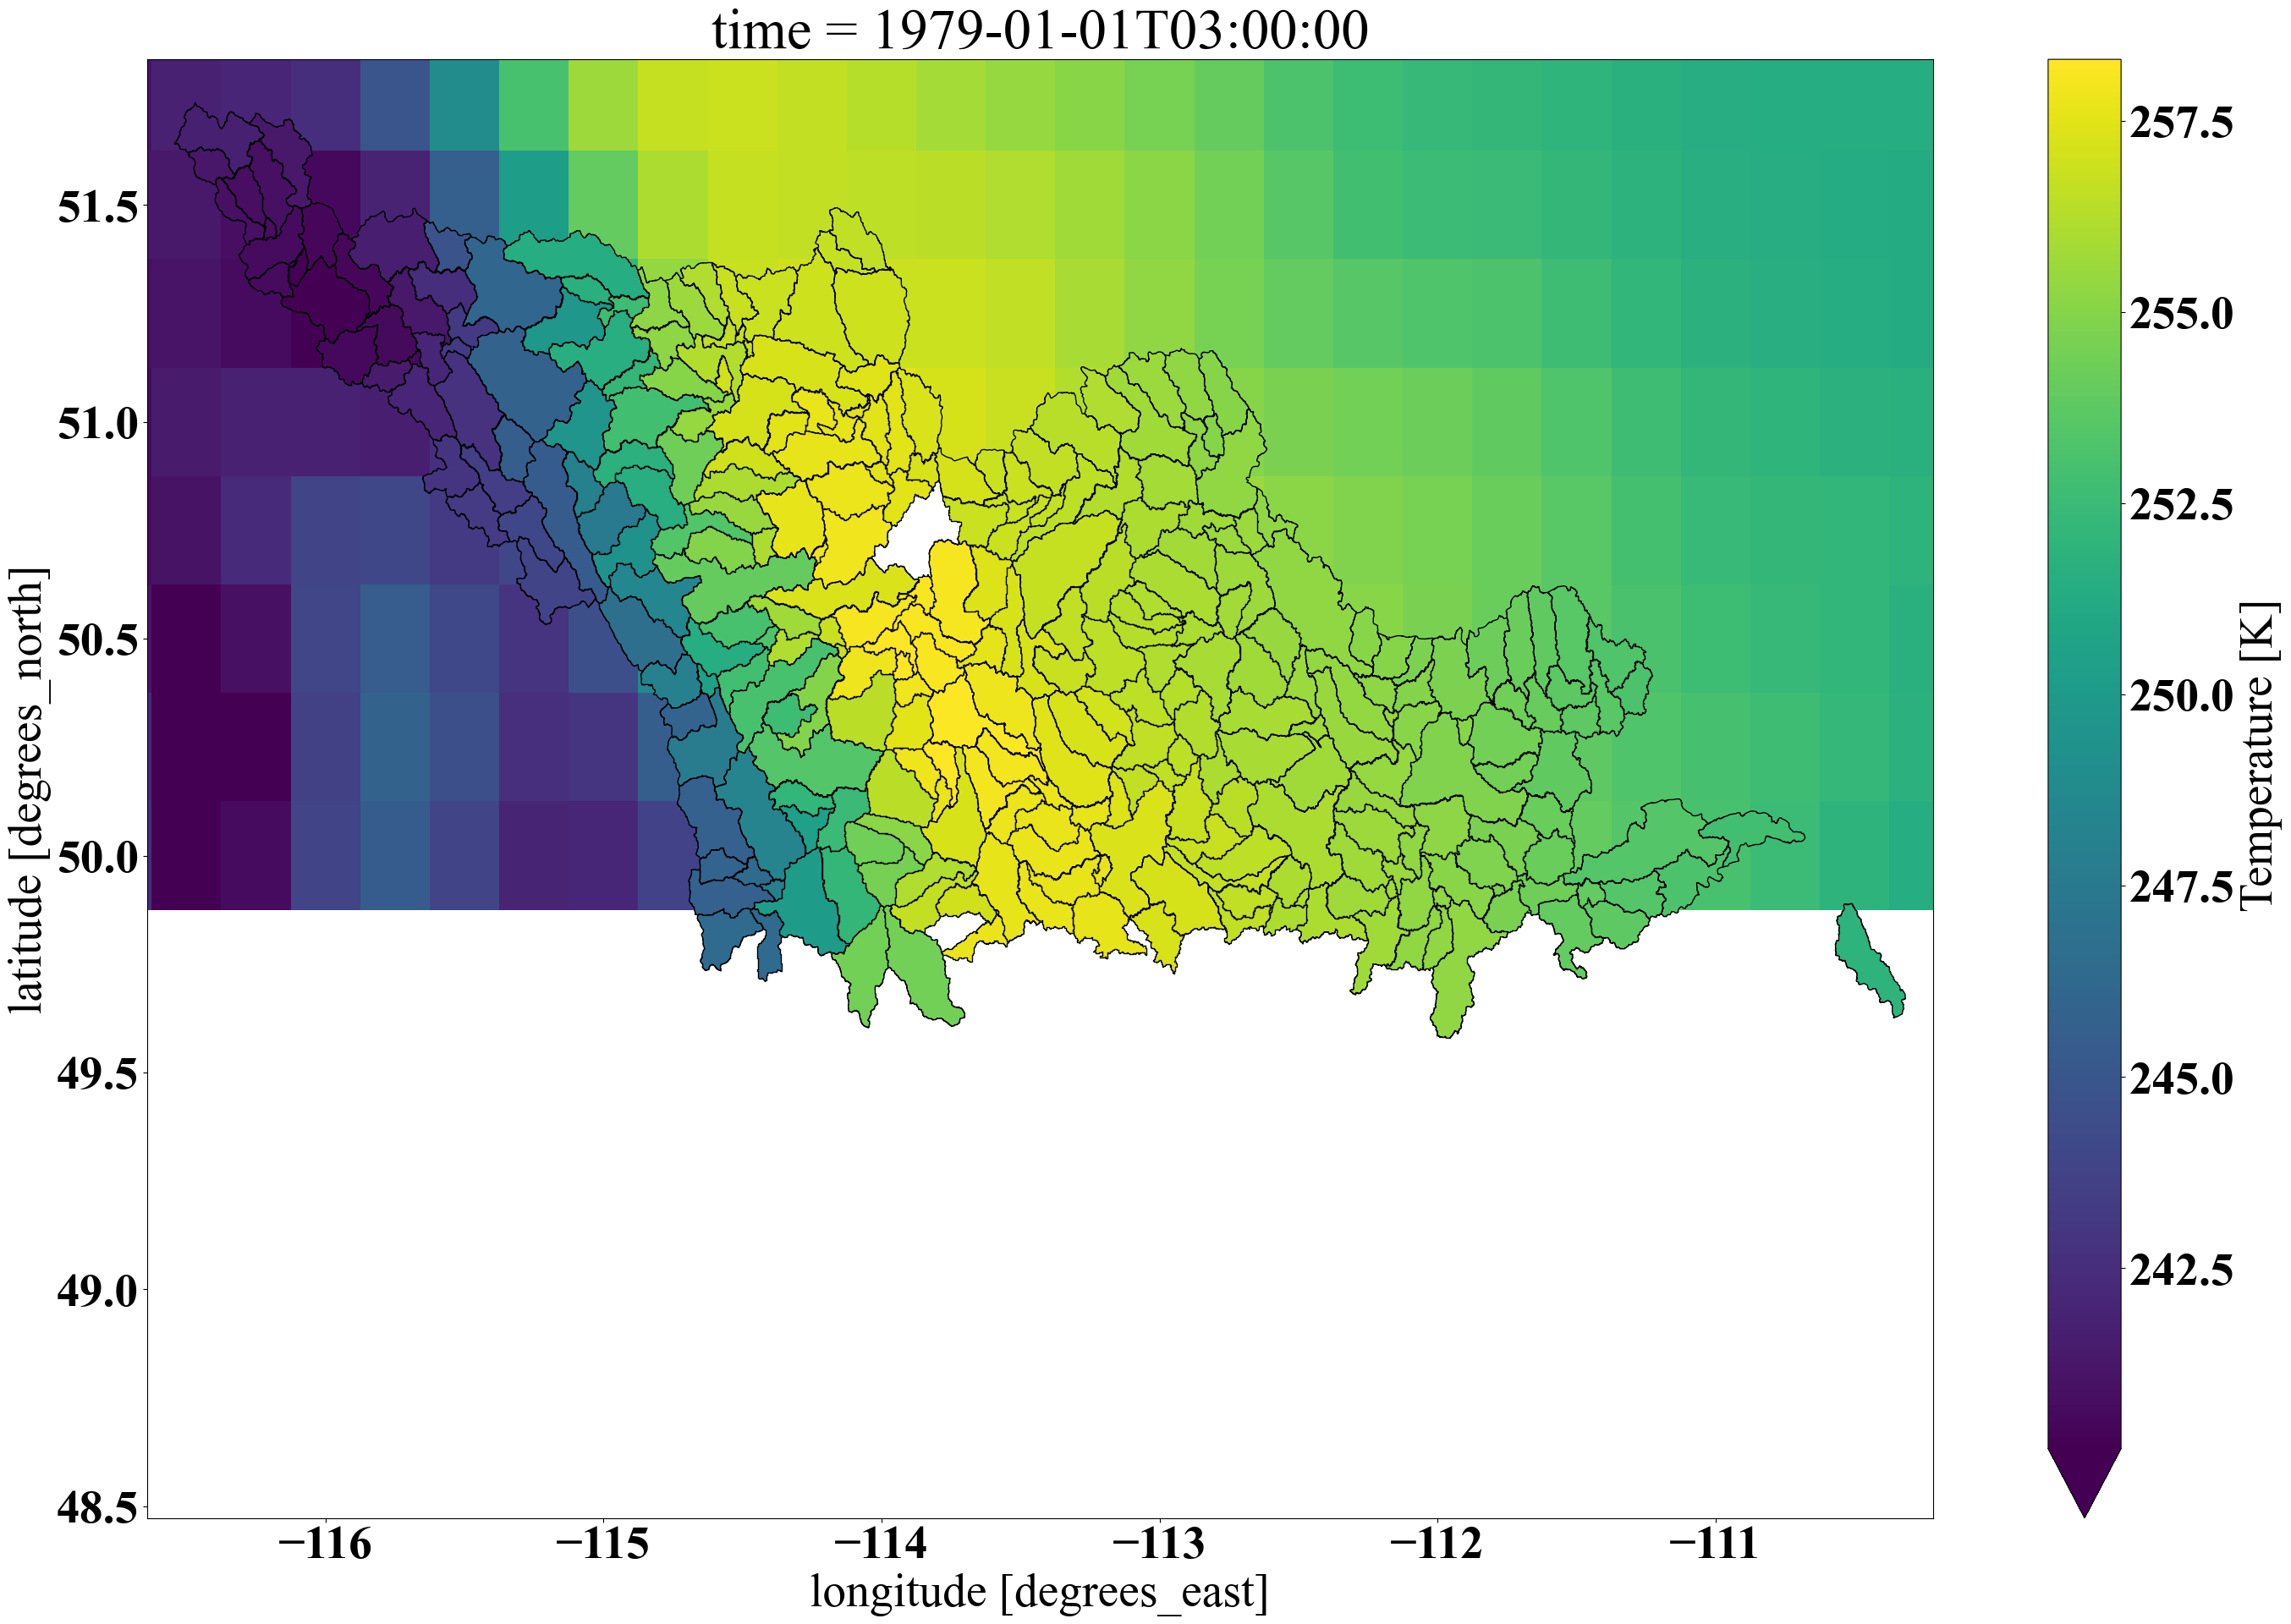

In [4]:
# loading EASYMORE
from easymore import Easymore

# initializing EASYMORE object
esmr = Easymore()

# define the source, and target files and parameters
case_name                  = 'ERA5_Medicine_Hat_NaN'  
source_nc_name             = './data/Source_nc_ERA5/ERA5_NA_19790101.ncNaN'
source_nc_var_lon          = 'longitude'
source_nc_var_lat          = 'latitude'
source_nc_var_time         = 'time'
source_nc_var_name         = 'airtemp'
remapped_nc_name           = './output/ERA5_Medicine_Hat_NaN_remapped_ERA5_NA_19790101.ncNaN'
remapped_nc_var_name       = 'temperature'
remapped_nc_var_ID         = 'ID'
remapped_nc_var_time       = 'time'
time_step_of_viz           = '1979-01-01 3:00:00'
folder_save_fig            = './fig/'
target_shp_name            = './data/target_shapefiles/South_Saskatchewan_MedicineHat.shp'
target_shp_field_ID        = 'COMID'
cmap                       = 'viridis'
linewidth_remapped         = 1
margin                     = 0.1
font_size                  = 40
fig_size                   = (30,20)

# the source nc file
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            fig_name                   = case_name+'_1.png',
            cmap                       = cmap,
            font_size                  = font_size,
            fig_size                   = fig_size)


# the source nc file zoom to target shapefile without showing the remapped variables
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            remapped_nc_name           = remapped_nc_name,
            remapped_nc_var_name       = remapped_nc_var_name,
            remapped_nc_var_ID         = remapped_nc_var_ID,
            remapped_nc_var_time       = remapped_nc_var_time,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            target_shp_name            = target_shp_name,
            linewidth_remapped         = linewidth_remapped,
            show_target_shp_flag       = True,
            fig_name                   = case_name+'_2.png',
            cmap                       = cmap,
            margin                     = margin,
            font_size                  = font_size,
            fig_size                   = fig_size)


# the source nc file zoom to target shapefile with showing the remapped variables
esmr.nc_vis(source_nc_name             = source_nc_name,
            source_nc_var_lon          = source_nc_var_lon,
            source_nc_var_lat          = source_nc_var_lat,
            source_nc_var_time         = source_nc_var_time,
            source_nc_var_name         = source_nc_var_name,
            remapped_nc_name           = remapped_nc_name,
            remapped_nc_var_name       = remapped_nc_var_name,
            remapped_nc_var_ID         = remapped_nc_var_ID,
            remapped_nc_var_time       = remapped_nc_var_time,
            time_step_of_viz           = time_step_of_viz,
            location_save_fig          = folder_save_fig,
            target_shp_name            = target_shp_name,
            target_shp_field_ID        = target_shp_field_ID,
            linewidth_remapped         = linewidth_remapped,
            show_target_shp_flag       = True,
            show_remapped_values_flag  = True,
            fig_name                   = case_name+'_3.png',
            cmap                       = cmap,
            margin                     = margin,
            font_size                  = font_size,
            fig_size                   = fig_size)



# merge the two figures into one
from PIL import Image, ImageFont, ImageDraw
image_list = [folder_save_fig+case_name+'_2.png' , folder_save_fig+case_name+'_3.png']
image_list_cropped = [folder_save_fig+case_name+'_cropped_2.png' , folder_save_fig+case_name+'_cropped_3.png']


# crop if needed, can be commneted
im = Image.open(image_list[0])
width, height = im.size      
crop_area = (0, 0, width*0.87, height) # (left, upper, right, lower)
cropped_image = im.crop(crop_area)
cropped_image.save(image_list_cropped[0])
#
im = Image.open(image_list[1])
width, height = im.size 
crop_area = (width*0.0622, 0, width, height) # (left, upper, right, lower)
cropped_image = im.crop(crop_area)
cropped_image.save(image_list_cropped[1])

# merging
images = [Image.open(x) for x in image_list_cropped]
widths, heights = zip(*(i.size for i in images))
total_width = sum(widths)
max_height = max(heights)
new_im = Image.new('RGB', (total_width, max_height))
x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]
new_im.save(folder_save_fig+case_name+'.png')
new_im.save(folder_save_fig+'ERA5_NaN.png')
new_im.show()
